In [288]:
# importing the required libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [289]:
# importing the ,csv file and reading the file
df = pd.read_csv('bank loans.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [290]:
# checking for the columns name 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [291]:
# checking the datatypes of the given columns and along with that checkig for number of the non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [292]:
# checking for the total no. of rows and columns present in the data
df.shape

(614, 13)

In [293]:
# checking for the statistical data of the numerical colulmns ; also checking for the outliers present in these columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [294]:
# checking for whether the null values present in the columns or not 
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [295]:
# looking how much null values present in the columns
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# EDA

In [296]:
# analysing the required data  for the analysing data
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [297]:
#allocating the column to another name
dg=df[['Gender']]

In [298]:
# dropping the values which are null values in the column
dg.dropna(how='any',inplace=True)

In [299]:
dg

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
609,Female
610,Male
611,Male
612,Male


In [300]:
# checking for any null values in the dg
dg.isna().any()

Gender    False
dtype: bool

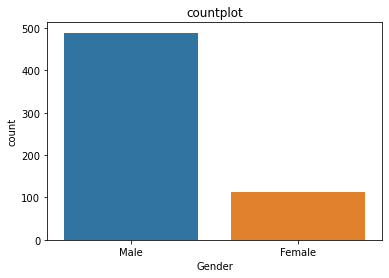

In [301]:
#visualising the data using countplot of loan status wrt. gender
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender',data=dg)
plt.title('countplot')
plt.show() 

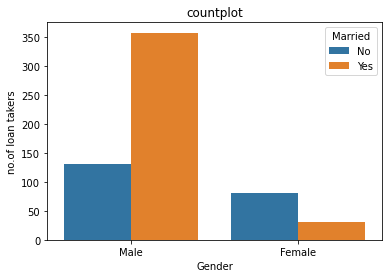

In [302]:
# visualing the data based oin gender and on married status
sns.countplot(data=dm,x='Gender',hue='Married')
plt.ylabel('no.of loan takers')
plt.title('countplot')
plt.show()

In [303]:
# now considering the two column values in analysis 

In [304]:
#getting two columns from the main dataset
dm=df[['Gender','Married']]

In [305]:
#dropping the columns which have null values
dm.dropna(how='any',inplace=True)

In [306]:
#checking for the null values in gender columns
dm['Gender'].isna().any()

False

In [307]:
#checking for the null values in married columns
dm['Married'].isna().any()

False

In [308]:
# checking for the indvidual kind of values in married columns
dm['Married'].value_counts()

Yes    388
No     210
Name: Married, dtype: int64

In [311]:
 # filtering the values in coulmns for the males who are married 
dM=dm[(dm['Gender']=="Male") & (dm['Married']=='Yes')]
dM

,Gender,Married
1,Male,Yes
2,Male,Yes
3,Male,Yes
5,Male,Yes
6,Male,Yes
...,...,...
607,Male,Yes
608,Male,Yes
610,Male,Yes
611,Male,Yes


In [312]:
# checking the shape of the filtered dM column
dM.shape

(357, 2)

In [313]:
# checking the null values in the each column of the dm
dM.isna().sum()

Gender     0
Married    0
dtype: int64

In [ ]:
# interference from the dM column
  #1.there are totally 357 males taken loans and who are married 

# interferences from the data which is processed

In [ ]:
#interfernces :-
               # 1.  mens are taking more loans than that of the females
               # 2.  married males are taking more loans than that of the un-married mens.
               # 3.  unmarried females are taking more loans than that of married females.

In [ ]:
## analysis using applicant income And loan amount

In [314]:
# considering two columns for analysing the loan amount vs applicant income
da=df[['ApplicantIncome','LoanAmount']]
da

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [315]:
# checking the column details
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ApplicantIncome  614 non-null    int64  
 1   LoanAmount       592 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.7 KB


In [316]:
# dropping the null values in the coulmns
da.dropna(how='any',inplace=True)
da

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
5,5417,267.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


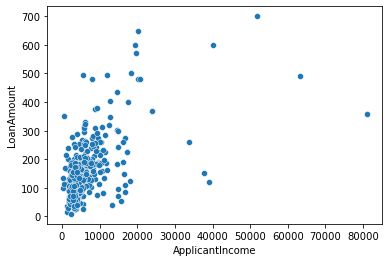

In [317]:
# visualising the scatterplot using selected data 
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=da)
plt.show()

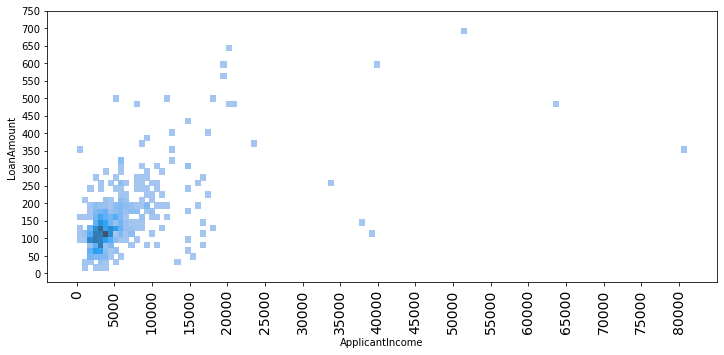

In [318]:
# visualizing the histplot using the slected data
plt.figure(figsize=(12,5))
sns.histplot(x='ApplicantIncome',y='LoanAmount',data=da)
plt.xticks(np.arange(0, 85000, 5000),rotation='vertical',Fontsize=14) 
plt.yticks(np.arange(0, 800, 50))
plt.show()

# interfernece 

In [ ]:
#interference :-
   #1. most of the applicant have a range of salary in btwn 1k to 10k; and loan amount is in btwn 50 to 200
   #2. as the applicant income increases the avg level of lona amount is also increasing.

## married vs unmarried  wrt loan amount vs applicant salry 

In [252]:
# analysis using other columns of the data using differnet columns
dl=df[['ApplicantIncome','LoanAmount','Gender','Married']]
dl.shape

(614, 4)

In [254]:
# analysing the shape of the selected data
dl.shape

(614, 4)

In [253]:
# analysing the datatypes of the data
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ApplicantIncome  614 non-null    int64  
 1   LoanAmount       592 non-null    float64
 2   Gender           601 non-null    object 
 3   Married          611 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.3+ KB


In [255]:
#checking for the null values in the data
dl.isna().any()

ApplicantIncome    False
LoanAmount          True
Gender              True
Married             True
dtype: bool

In [256]:
# dropping the null data in the columns 
dl.dropna(how='any',inplace=True)
dl

,ApplicantIncome,LoanAmount,Gender,Married
1,4583,128.0,Male,Yes
2,3000,66.0,Male,Yes
3,2583,120.0,Male,Yes
4,6000,141.0,Male,No
5,5417,267.0,Male,Yes
...,...,...,...,...
609,2900,71.0,Female,No
610,4106,40.0,Male,Yes
611,8072,253.0,Male,Yes
612,7583,187.0,Male,Yes


In [257]:
# now again checking the data for the datatypes
dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 1 to 613
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ApplicantIncome  577 non-null    int64  
 1   LoanAmount       577 non-null    float64
 2   Gender           577 non-null    object 
 3   Married          577 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.5+ KB


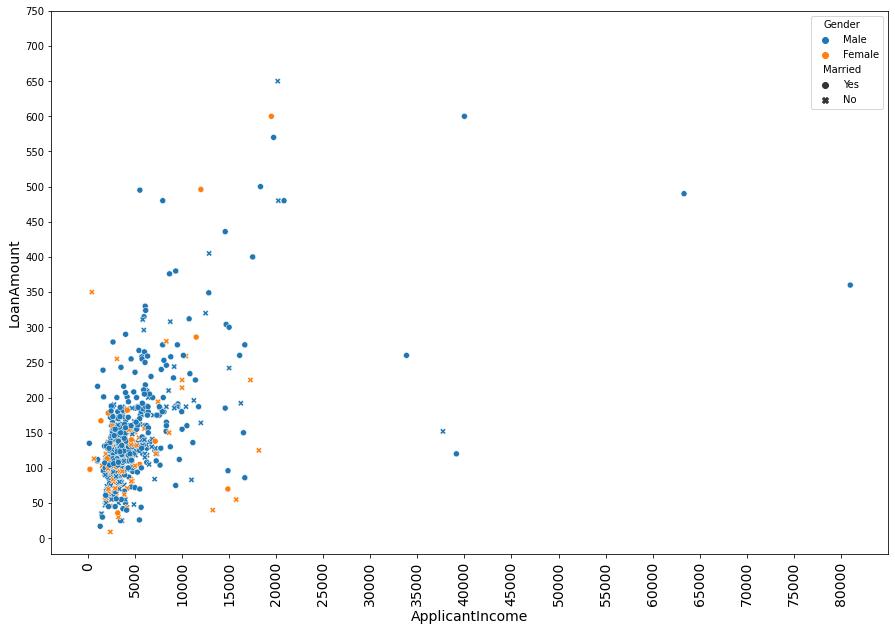

In [264]:
# visualizing the data 
plt.figure(figsize=(15,10))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=dl,hue='Gender',style='Married')
plt.xlabel('ApplicantIncome',Fontsize=14)
plt.ylabel('LoanAmount',Fontsize=14)
plt.xticks(np.arange(0, 85000, 5000),rotation='vertical',Fontsize=14) 
plt.yticks(np.arange(0, 800, 50))
plt.show()

In [ ]:
#interference from the data
#1. we can see that more no. of married males are there who applied for loans than that of unamrried males
#2. in females more no. of unamrried females are taking loans than that of married females
#3. as males income are increasing they tends to apply for more loan amount
